# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# display the graphs
%matplotlib inline

# display values up to 2 decimal places
pd.set_option("display.float_format", lambda x: "%.2f" % x)

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/01.Python Foundations/Week 4/Food Hub Project Exploratory Data Analysis/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

From the very start we can see that there is already missing ratings in Column 'rating'. We will have to deal with 'not given' values on this column.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# rows and columns present in the data
df.shape

(1898, 9)

#### Observations:
1898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* We have 5 numeric data types from which 4 are integers and 1 is float.

* order_id and customer_id make perfect sense to be an integer.

* With the food_preparation_time and delivery_time I would leave it as is to compare and treat them as integers but depending on the kind information we want to flesh out of this data we may need to change it to datetime data type.

* cost_of_order is in dolars and cents son makes sense to be a float data type.

* We have 4 Object type data.

* restaurant_name and cuisine_type and day_of_the_week would make perfect sense to leave them as is. If the actual day in the column day_of_the_week instead of weekday and weekend it would've been helpful to changer it datetime data type

* 'Rating' is and object type because it contains 'not given' as a rating. we should replace with a NaN value and treat it as missing data and analyze how to deal with it so could be a numeric value and be able to make a statistical analysis.

In [6]:
# Let's replace it with a nan value and check the count again
df['rating'] = df['rating'].replace(['Not given'],np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [7]:
# Let's see unique values of rating
df['rating'].unique()

array([nan, '5', '3', '4'], dtype=object)

In [8]:
# Now we can change the rating data type to float and check if changes were done properly
df['rating'] = df['rating'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


Now we can analyze the rating data as a number and compare it and make mathematical operations with that data.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
# checking missing values
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:
'Rating' has 736 missing values. In other words, 38.77% of the ratings are 'not given'.
As showed on the next question, the median and Q3 and max value of 'rating' is 5.0 and a std of .74 and a mean of 4.34.

In [10]:
# Let's make the imputation of those ratings to the median of the values in the rating column
df['rating'] = df['rating'].fillna(value = df['rating'].median())

In [11]:
# Let's check if that worked
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:
# Statistical Summary for numerical variables showed Transposed
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
rating,1898.00,4.60,0.66,3.00,4.00,5.00,5.00,5.00
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
The minimum time it takes for food to be prepared once an order is placed is 20 minutes, the average wait time is 27.37 minutes (or 27:22.2), and the maximum it takes to be prepared is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [13]:
# At this point there are no missing values.
df['rating'].unique()

array([5., 3., 4.])

#### Observations:
There were 736 orders not rated before any imputations were made.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

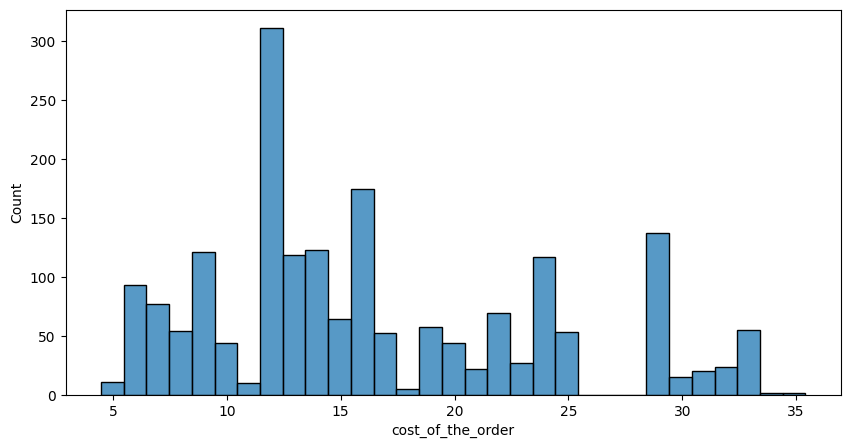

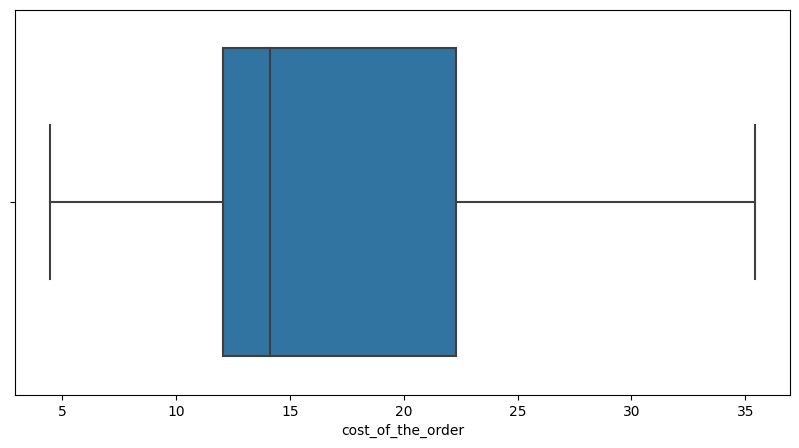

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='cost_of_the_order',bins=31)
plt.show()
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

#### Observations:

25% of the orders cost around $12.00 but the distribution is a little skewed to the right.

We have no outliers in our cost_of_order boxplot.

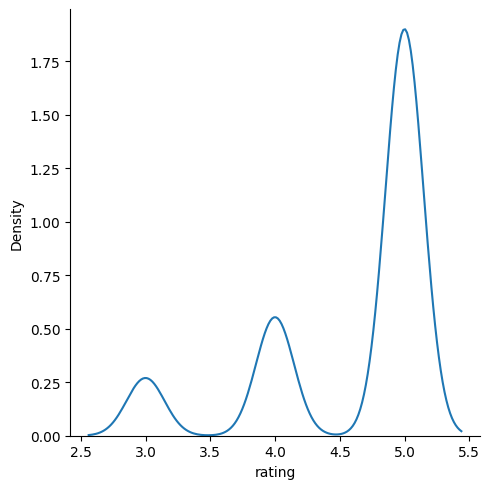

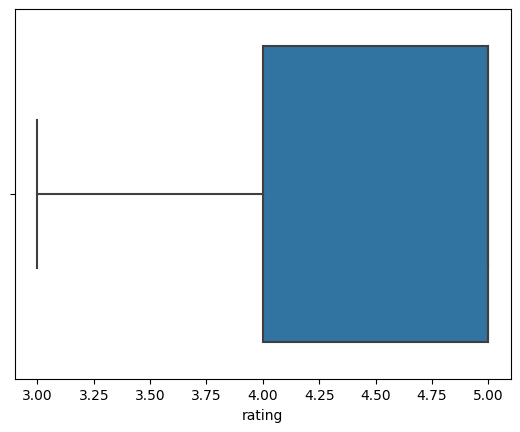

In [15]:
# Let's analyze how ratings are distributed
# displot con kernel density estimation
sns.displot(data=df,x='rating',kind='kde')
plt.show()

#Boxplot
sns.boxplot(data=df,x='rating')
plt.show()

#### Observations:

* The rating column after all the imputations show a highly skewed plot to the left.
* Customers have a fairly good experience since no ratings below 3 were found.
* With that in mind the imputations were made
* There are not outliers

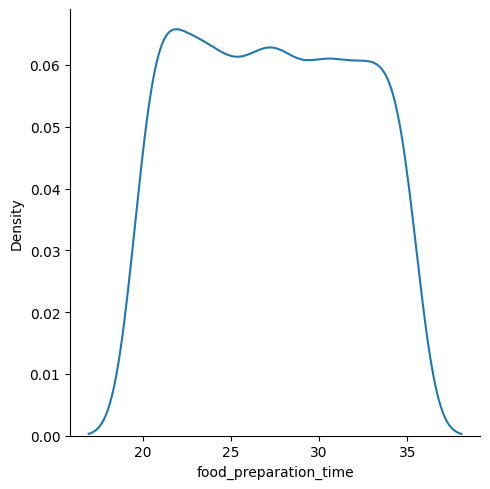

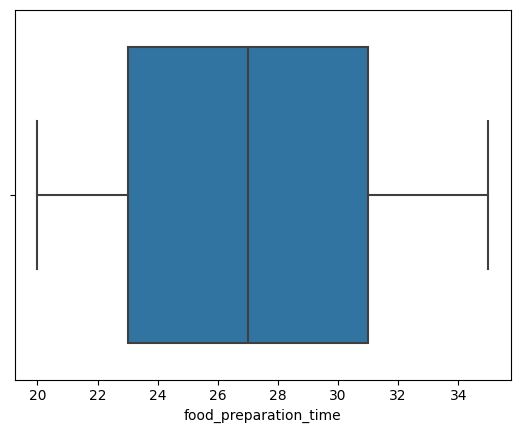

In [16]:
# displot and kernel density estimation
sns.displot(data=df,x='food_preparation_time',kind='kde')
plt.show()

#Boxplot
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

#### Observations:
* We can see a little bump in food preparation time around 20 minutes.
* Aside from that bump the preparation time distributiion seems normal
* no outliers are observed in this column

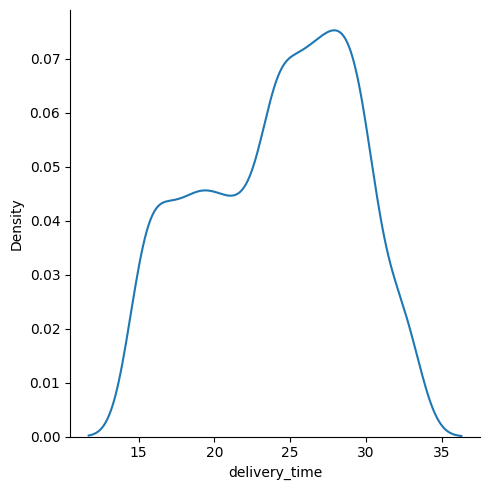

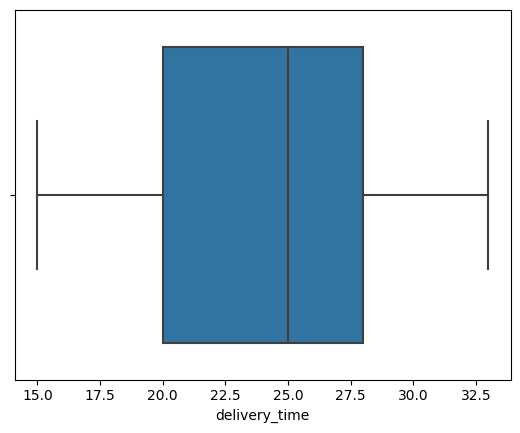

In [17]:
# displot kernel density estimation
sns.displot(data=df,x='delivery_time',kind='kde',)
plt.show()

#Boxplot
sns.boxplot(data=df,x='delivery_time')
plt.show()

#### Observations:
* this shows that is a little skewed to the left so some orders take 20 minutes or less but most of the orders are going to take more than 25 minutes.
* No outliers are present.

In [18]:
# Let's create a column called 'Total_Wait_Time' adding the food_preparation_time and delivery_time for further analysis
df['total_wait_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_wait_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,5.00,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,5.00,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.00,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.00,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.00,25,24,49


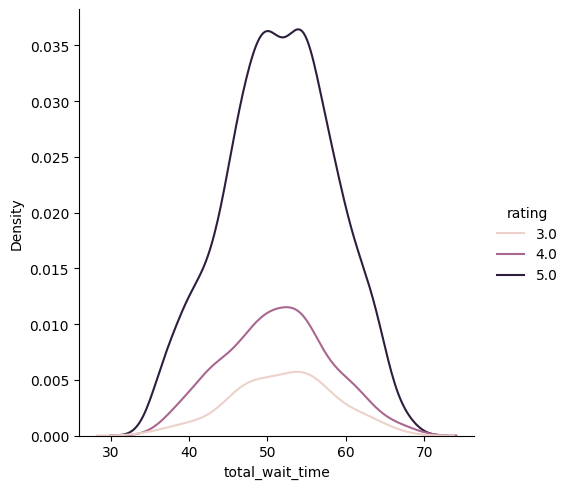

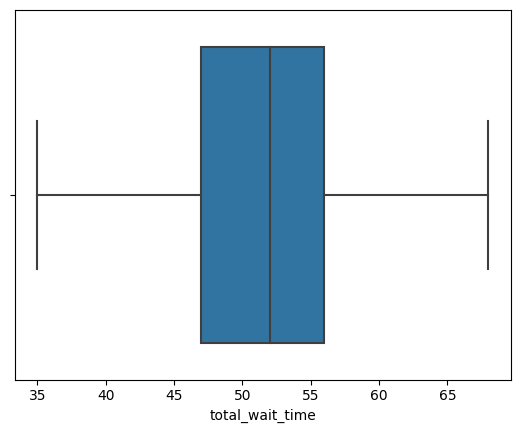

In [19]:
# displot con kernel density estimation
sns.displot(data=df,x='total_wait_time',kind='kde', hue='rating')
plt.show()

#Boxplot
sns.boxplot(data=df,x='total_wait_time')
plt.show()

#### Observations:
* Most of the orders take around 50 minutes in total.
* Normal distribution
* The rating hue shows no skews or difference betwewen each other than the tendency of the rating column that is mostly 5.

We will find the correlation between the total wait time and the ratings later on.

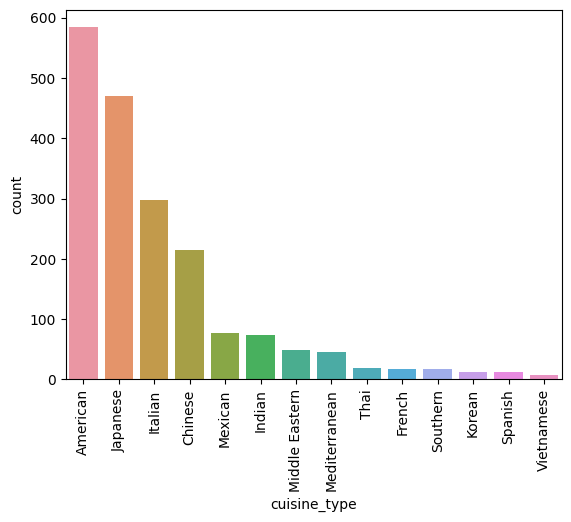

In [20]:
# Let's rank and see the cuisine_type column
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### Observations:
* The favorite cuisine is American, followed by Japanese, Italian and Chinese with at least 200 orders each. from there it drops to less than a 100.

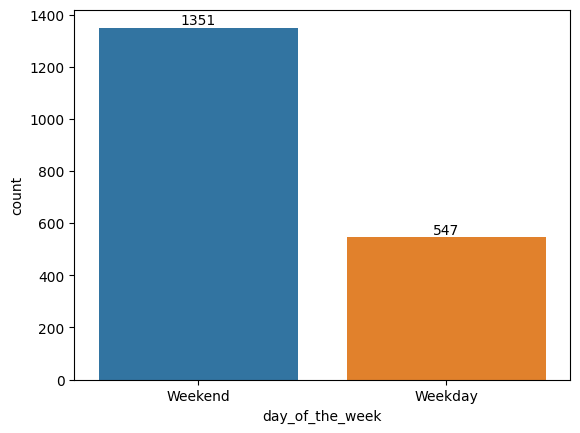

In [21]:
# Let's see how the weekends and weekdays perform in relation with wach other
ax = sns.countplot(data=df, x='day_of_the_week')

# Let's display the values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

#### Observations:
* 71.18% of the orders will come on weekends


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [22]:
print(df['restaurant_name'].value_counts())

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64


#### Observations:
The top 5 restaurants in terms of the number of orders received are Shake Shack,
The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

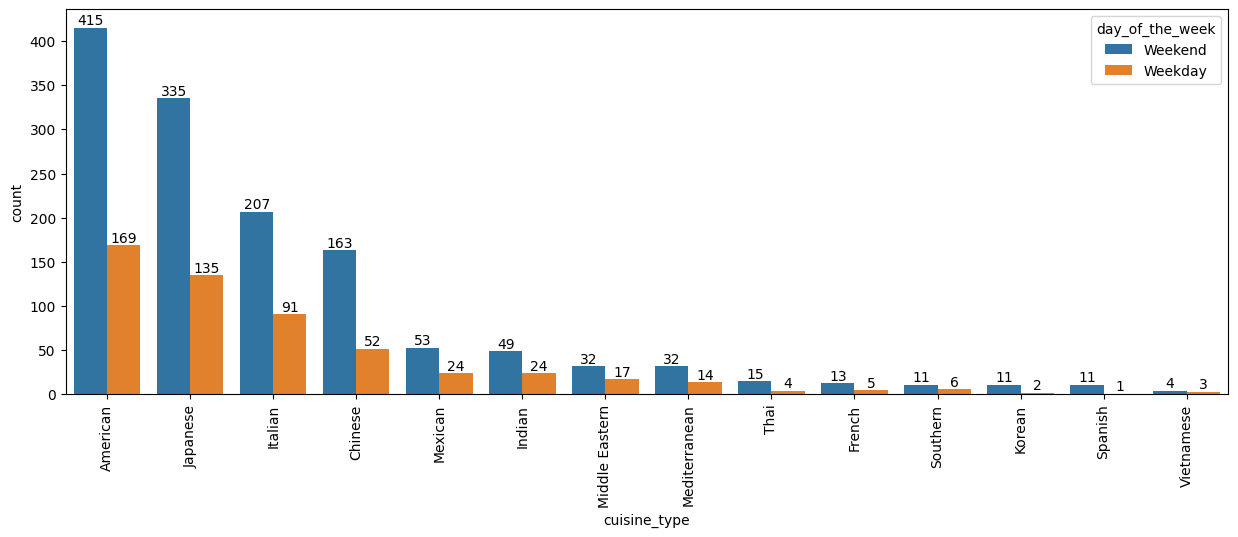

In [23]:
# To display that data in a plot we can do it this way.
# Let's rank and see the cuisine_type column and use a hue function to separate weekends from weekdays and show the values of each bar
plt.figure(figsize=(15,5))
ax = sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index, hue='day_of_the_week')

# Add value labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()

#### Observations:
American is the most popular cuisine on weekends.

In [24]:
# To display it in a textual way
# Let's display the info by grouping by day of the week and then by cuisine then display the count of unique orders sorted in a descending order so we can rank it.
df.groupby(['day_of_the_week', 'cuisine_type'])[['order_id']].count().sort_values(by=['day_of_the_week','order_id'], ascending=False)

order_id
day_of_the_week cuisine_type            
Weekend         American             415
                Japanese             335
                Italian              207
                Chinese              163
                Mexican               53
                Indian                49
                Mediterranean         32
                Middle Eastern        32
                Thai                  15
                French                13
                Korean                11
                Southern              11
                Spanish               11
                Vietnamese             4
Weekday         American             169
                Japanese             135
                Italian               91
                Chinese               52
                Indian                24
                Mexican               24
                Middle Eastern        17
                Mediterranean         14
                Southern               6
                French                 5
                Thai                   4
                Vietnamese             3
                Korean                 2
                Spanish                1

Same observation. American is the most popular cuisine on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [25]:
# Count of orders in the df
total_orders = df['order_id'].nunique()
# print(total_orders)

# Let's see the orders above 20 dollars
orders_above_20 = df[df['cost_of_the_order'] > 20]['order_id'].nunique()

# Let's calculate the percentage
percentage = (orders_above_20 / total_orders) * 100

print(percentage)


29.24130663856691


#### Observations:
The percentage of orders that cost more than 20 dollars is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [26]:
# Let's display the statistical data again.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
rating,1898.00,4.60,0.66,3.00,4.00,5.00,5.00,5.00
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00
total_wait_time,1898.00,51.53,6.83,35.00,47.00,52.00,56.00,68.00


#### Observations:
24.16 minutes is the mean order delivery time or 24:09.6 seconds.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [27]:
df.groupby(['customer_id'])[['order_id']].count().sort_values(by=['order_id'], ascending=False)

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7
...,...
105903,1
105992,1
106006,1


#### Observations:

These are the top 3 customer and the number of orders placed:

customer_id 52832 has placed 13 orders.

customer_id 47440 has placed 10 orders

customer_id 83287 has placed 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


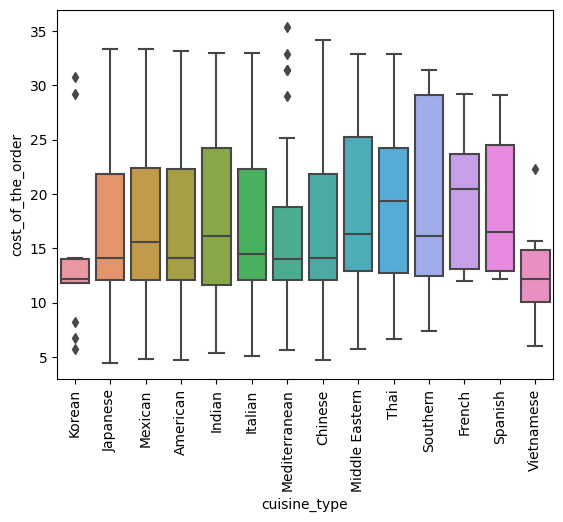

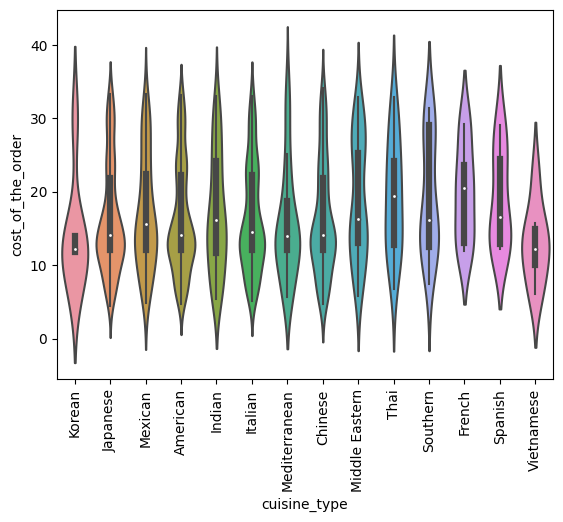

In [28]:
# Let's analyze the cost_of_the_order by cuisine_type
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation=90)
plt.show()

sns.violinplot(data=df, x='cuisine_type', y='cost_of_the_order',orient='v')
plt.xticks(rotation=90)
plt.show()

#### Observations:
* Now we can identify some outliers in some cuisine_type cost_of_the_orders in the case of Korean, Mediterranean and Vietnamese. This could imply that there are some luxury restaruantes of these type of cuisines and in the case of Korean there are very economic options as well.
* Southern Cuisine shows the highest Q3 of the set.
* Vietnamese is on the lower range of cost_of_the_order

In [29]:
# Let's see if there's a pattern in the outliers per cuisine_type.

# Let's declare outliers_df as the data set where we are going to store the outlier orders.
# Making a for loop that for each cuisine type we calculate the outliers and ultimately store them in outliers_df and print it to seek patterns in any column.
# We calculate the price whisker limit and all the values above and below those limits are going to be treated as outliers using .quantile(0.25) for Q1 and .quantile(0.75) for Q3. So lower_bound would be Q1 - 1.5 * IQR being IQR=(Q3-Q1) and upper_bound would be Q3 + 1.5 * IQR
# Then the rows with values below the lower bound and above the upper bound are going to be stored in outliers_data
# The we concatenate all the results of each iteration for cuisine_type from outliers_data into the outliers_df
outliers_df = pd.DataFrame()
for cuisine_type in df['cuisine_type'].unique():
    data = df[df['cuisine_type'] == cuisine_type]
    lower_bound = data['cost_of_the_order'].quantile(0.25) - 1.5 * (data['cost_of_the_order'].quantile(0.75) - data['cost_of_the_order'].quantile(0.25))
    upper_bound = data['cost_of_the_order'].quantile(0.75) + 1.5 * (data['cost_of_the_order'].quantile(0.75) - data['cost_of_the_order'].quantile(0.25))
    outliers_data = data[(data['cost_of_the_order'] < lower_bound) | (data['cost_of_the_order'] > upper_bound)]
    outliers_df = pd.concat([outliers_df, outliers_data])

# Display the outliers DataFrame
print(outliers_df)

      order_id  customer_id    restaurant_name   cuisine_type  \
0      1477147       337525            Hangawi         Korean   
301    1476856        59674           Woorijip         Korean   
464    1477600       347263            Hangawi         Korean   
653    1478363       138024       Cho Dang Gol         Korean   
1550   1477307       141732       Cho Dang Gol         Korean   
524    1476934       126134  Jack's Wife Freda  Mediterranean   
573    1477814        62359              Pylos  Mediterranean   
858    1476968        99621  Jack's Wife Freda  Mediterranean   
1132   1477961       167738  Jack's Wife Freda  Mediterranean   
1148   1478044       354719  Jack's Wife Freda  Mediterranean   
746    1477189        54630         V-Nam Cafe     Vietnamese   

      cost_of_the_order day_of_the_week  rating  food_preparation_time  \
0                 30.75         Weekend    5.00                     25   
301                8.25         Weekend    3.00                     26 

#### Observations:
* This orders are placed mainly on weekends.
* There is no pattern in customer_id so they may be occasion driven orders.
* We do find a pattern in the Mediterranean cuisine type with the restaurant Jack's Wife Freda and the max value in net_revenue values is obviusly on this list and is 8.85.

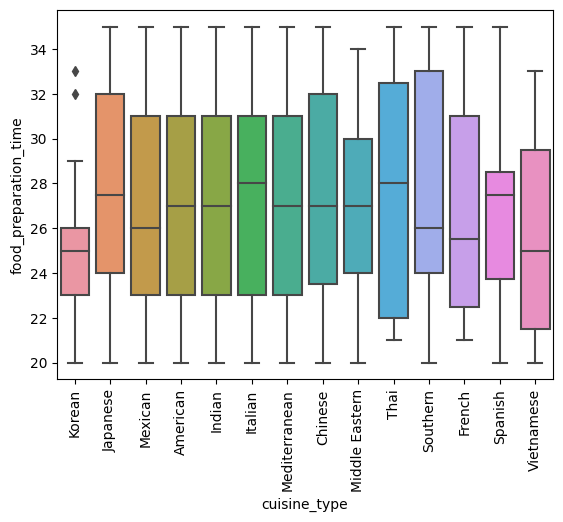

In [30]:
# Let's analyze the food_preparation_time by cuisine_type
sns.boxplot(data=df,x='cuisine_type',y='food_preparation_time')
plt.xticks(rotation=90)
plt.show()

#### Observations:
There's a normal distribution as well with some special cases:
  * Korean tends to be the fastest in it's preparation with some outliers that take too much time for being Korean but would be acceptable and not an outlier if it were another cuisine type.

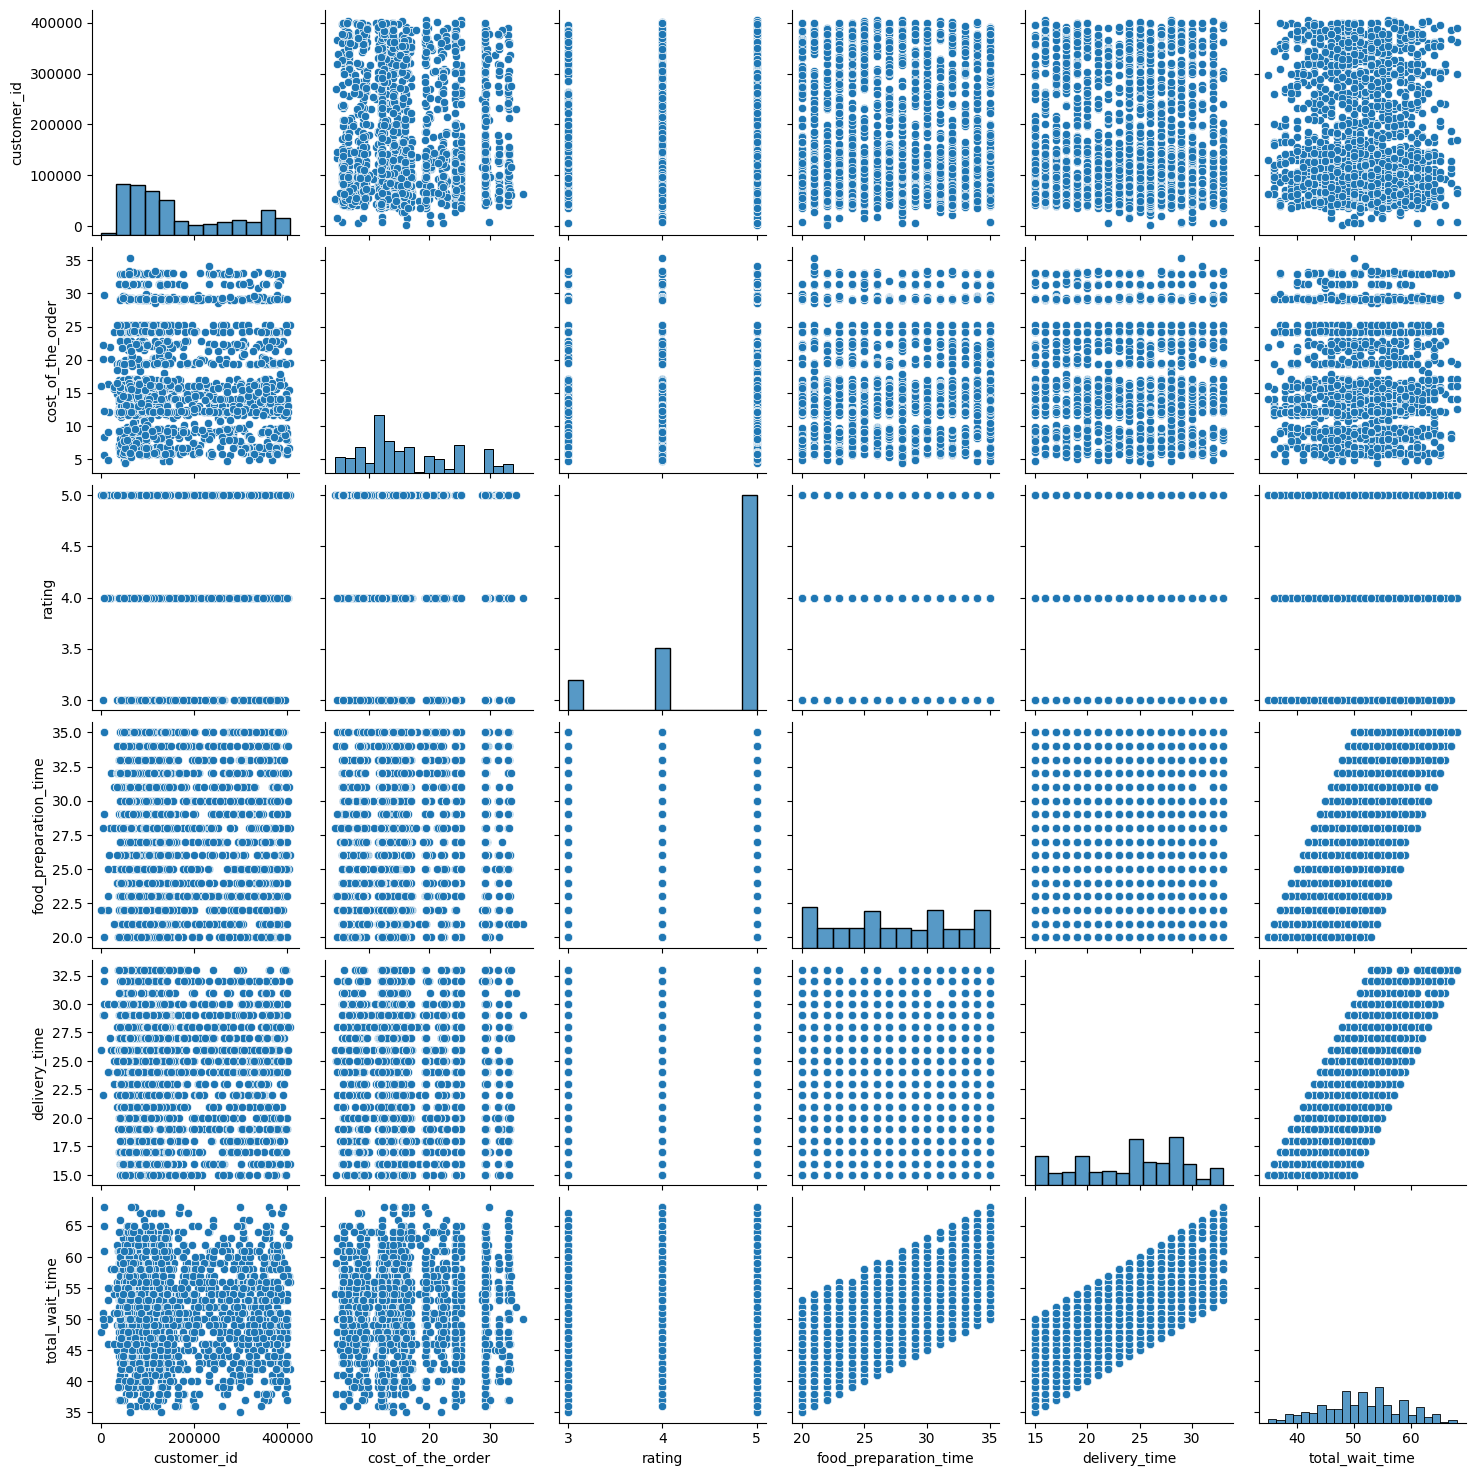

In [31]:
# Let's look for correlations between numerical variables.
sns.pairplot(data=df[['customer_id', 'cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time', 'total_wait_time']])

#### Observations:
* The only obvious correlation is between total_wait_time and delivery_time and food_preparation_time as total_wait_time is constructed from the sum of delivery_time and food_preparation_time.

In [32]:
# Let's remember this data to continue the analysis
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.00,NaN,NaN,NaN,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,NaN,NaN,NaN,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.00,NaN,NaN,NaN,16.50,7.48,4.47,12.08,14.14,22.30,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898.00,NaN,NaN,NaN,4.60,0.66,3.00,4.00,5.00,5.00,5.00
food_preparation_time,1898.00,NaN,NaN,NaN,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,NaN,NaN,NaN,24.16,4.97,15.00,20.00,25.00,28.00,33.00
total_wait_time,1898.00,NaN,NaN,NaN,51.53,6.83,35.00,47.00,52.00,56.00,68.00


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [33]:
# First we need to filter a df with all the restaurants with more than 50 rating count AND rating mean larger than 4.
filtered_df = df.groupby('restaurant_name').filter(lambda x: x['rating'].count() > 50 and x['rating'].mean() > 4)

# Then we need to construct a summary where we can displayu the average of the ratin and the count of these ratings and print it sorted by the highest rated restaurant
restaurant_summary = filtered_df.groupby('restaurant_name').agg(rating_mean=('rating', 'mean'), rating_count=('rating', 'count')).sort_values('rating_mean', ascending=False)

print(restaurant_summary)

                           rating_mean  rating_count
restaurant_name                                     
The Meatball Shop                 4.69           132
Shake Shack                       4.56           219
Blue Ribbon Fried Chicken         4.55            96
Blue Ribbon Sushi                 4.52           119
Parm                              4.50            68
RedFarm Hudson                    4.49            55
RedFarm Broadway                  4.47            59


#### Observations:
We need to make the note here that some imputations prior this questions were made that may have changed this result as the count is now different.
In that case we should've included *"and 'not given' not in x['rating']"* in the filter function along with the >50 count and >4 mean


### The restaurants elegible for the promotional offer are:

The Meatball Shop, Shake Shack, Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Parm, RedFarm Hudson and RedFarm Broadway.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [34]:
# Let's create an empty column named 'net_revenue' with the following conditional statements:
df['net_revenue'] = 0
for index, row in df.iterrows():       # here we are instructing to iterate row by row
    cost = row['cost_of_the_order']    # here we are extracting and storing the cost_of_the_order under cost variable
    if cost > 20:                      # here we run the conditional statements
        df.at[index, 'net_revenue'] = cost * 0.25
    elif cost > 5:
        df.at[index, 'net_revenue'] = cost * 0.15
    else:
        df.at[index, 'net_revenue'] = 0

# Let's Calculate the sum of 'net_revenue'
total_net_revenue = df['net_revenue'].sum()

print(total_net_revenue)

6166.303


#### Observations:
The net revenue for these orders under those conditions is $6,166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [35]:
# Count of orders in the df
total_orders = df['order_id'].nunique()

# Let's see the orders that take more than 60 mins
orders_longer_60 = df[df['total_wait_time'] > 60]['order_id'].nunique()

# Let's calculate the percentage
percentage_more_60mins = (orders_longer_60 / total_orders) * 100

print(percentage_more_60mins)

10.537407797681771


#### Observations:
10.53% take longer than 60 minutes from the time the order is placed to the delivery time.

The total of preparation and delivery times were calculated previously as total_wait_time

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

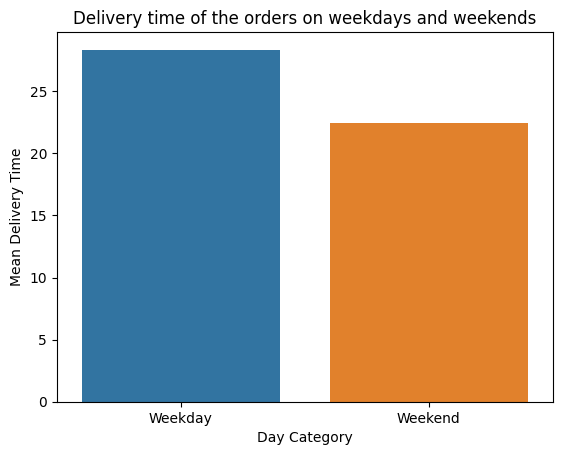

In [36]:
# First calculate the mean of the delivery_time when the day_of_the_week is weekday and weekend
weekday_mean = df.loc[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekend_mean = df.loc[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()

# We store that data as a list in a new variable mean_delivery_time
mean_delivery_time = [weekday_mean, weekend_mean]

# Let's plot with it's respective labels
sns.barplot(x=['Weekday', 'Weekend'], y=mean_delivery_time)
plt.xlabel('Day Category')
plt.ylabel('Mean Delivery Time')
plt.title('Delivery time of the orders on weekdays and weekends')
plt.show()

#### Observations:
On weekdays the delivery time mean is higher. Maybe the weekday traffic affects because on weekends the delivery time is a little bit faster on average but by less than 5 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The Cuisine types that add more than 50% of the orders are: American, Japanese, Italian and Chinese.

* There were 736 missing ratings and 75% of the ones we have are 5 stars.
  This need more analysis to make sure that the experience is actually this good. rating below the 3 star mark are non-existing.

* Surprisingly there is no correlation showed between price or waiting time and the rating of the transaction, but we have to consider that there were no outliers in the waiting time so if everything is in the acceptable waiting time range the rating will not be affected.

* More than 70% of the orders are placed on Weekends.

* There are cuisine type orders like meditarranean and korean that can get expensive, considering these are the only cuisines showing outliers in the cost_of_the_order.


### Recommendations:

* Promote orders on weekdays
* Offer marketing packages for restaurants that are not American, Japanese, Italian and Chinese to try to promote the different types of cuisine
* To ensure that the customer is having the exprience reflected on the ratings, a follow up on some random orders via app to share their experience would be helpful. A coupon for some weekday order for an exotic cuisine might be a strategical incentive. Not only to promote more ratings but to make sure we are hearing all possible opinions


---